## Programação Assíncrona

A programação assíncrona é um paradigma de programação que permite que um programa execute várias tarefas aparentemente ao mesmo tempo, sem bloquear a execução de outras tarefas enquanto aguarda a conclusão de uma operação de longa duração (como uma requisição de rede, leitura/escrita de arquivos, etc.).

Em vez de esperar que uma operação seja concluída antes de passar para a próxima, a programação assíncrona permite que o programa inicie uma operação e continue a executar outras tarefas. Quando a operação assíncrona é concluída, o programa é notificado e pode lidar com o resultado.

**Principais Conceitos:**

* **Não bloqueante:** As operações assíncronas não bloqueiam o fluxo principal do programa.
* **Callbacks/Promises/Async/Await:** Existem diferentes mecanismos em linguagens de programação para lidar com a assincronicidade, como callbacks, Promises (em JavaScript) ou as palavras-chave `async` e `await` (em Python, JavaScript, C#, entre outras).
* **Event Loop:** Em muitos ambientes assíncronos (como Node.js), um "event loop" gerencia a execução de tarefas assíncronas e callbacks.

**Vantagens:**

* **Melhor desempenho:** Permite que o programa utilize melhor os recursos do sistema, especialmente em tarefas I/O bound.
* **Maior responsividade:** A interface do usuário não congela enquanto o programa aguarda a conclusão de uma operação.
* **Escalabilidade:** Facilita o gerenciamento de um grande número de conexões simultâneas em servidores.

**Exemplo Simples (Conceitual):**

Imagine que você precisa baixar três arquivos da internet. Em um modelo síncrono, você baixaria o primeiro arquivo, esperaria terminar, depois baixaria o segundo, esperaria, e assim por diante. Em um modelo assíncrono, você iniciaria o download dos três arquivos quase simultaneamente e continuaria fazendo outras coisas. Quando cada download terminar, você seria notificado para processar o arquivo.

Em resumo, a programação assíncrona é essencial para construir aplicações modernas e responsivas, especialmente aquelas que lidam com muitas operações de entrada e saída.

## Assincronia em Python

Em Python, a assincronia é frequentemente implementada usando o módulo `asyncio`. Ele fornece uma estrutura para escrever código concorrente usando a sintaxe `async/await`.

**Principais Conceitos em Python:**

* **`async def`:** Define uma função assíncrona (corrotina). Essas funções podem pausar sua execução e permitir que outras tarefas sejam executadas.
* **`await`:** Usado dentro de uma função `async def` para esperar a conclusão de outra corrotina ou de um objeto "awaitable". Isso libera o loop de eventos para executar outras tarefas.
* **Loop de Eventos:** O `asyncio` usa um loop de eventos para gerenciar a execução de corrotinas. Ele decide qual corrotina executar em um determinado momento, alternando entre elas quando uma encontra um `await`.
* **Corrotinas:** Funções definidas com `async def` são chamadas de corrotinas. Elas são executadas pelo loop de eventos.
* **Tarefas (`Tasks`):** O `asyncio` pode envolver corrotinas em `Tasks` para agendá-las para execução no loop de eventos.
* **Objetos `Awaitable`:** Objetos que podem ser "aguardados" com `await`, como corrotinas, `Tasks`, Futures, etc.

In [ ]:
import asyncio
import time

# Exemplo 1: Uma corrotina simples
async def saudar(nome):
    print(f"Olá, {nome}!")
    await asyncio.sleep(1) # Simula uma operação assíncrona (espera)
    print(f"Até mais, {nome}!")

async def main_saudar():
    await saudar("Mundo")
    await saudar("Assíncrono")

await main_saudar() # Descomente para rodar este exemplo



Olá, Mundo!
Até mais, Mundo!
Olá, Assíncrono!
Até mais, Assíncrono!


In [ ]:
# Exemplo 2: Executando múltiplas corrotinas concorrentemente
async def tarefa_lenta(id):
    print(f"Tarefa {id} começando...")
    await asyncio.sleep(2)
    print(f"Tarefa {id} terminada.")

async def main_tarefas():
    tarefa1 = asyncio.create_task(tarefa_lenta(1))
    tarefa2 = asyncio.create_task(tarefa_lenta(2))
    await tarefa1
    await tarefa2

await main_tarefas() # Descomente para rodar este exemplo



Tarefa 1 começando...
Tarefa 2 começando...
Tarefa 1 terminada.
Tarefa 2 terminada.


In [ ]:
# Exemplo 3: Usando asyncio.gather para rodar corrotinas em paralelo e esperar por todas
async def tarefa_com_retorno(id, delay):
    print(f"Tarefa com retorno {id} começando...")
    await asyncio.sleep(delay)
    print(f"Tarefa com retorno {id} terminada.")
    return f"Resultado da Tarefa {id}"

async def main_gather():
    resultados = await asyncio.gather(
        tarefa_com_retorno(1, 3),
        tarefa_com_retorno(2, 1),
        tarefa_com_retorno(3, 2)
    )
    print("Resultados:", resultados)

await main_gather() # Descomente para rodar este exemplo



Tarefa com retorno 1 começando...
Tarefa com retorno 2 começando...
Tarefa com retorno 3 começando...
Tarefa com retorno 2 terminada.
Tarefa com retorno 3 terminada.
Tarefa com retorno 1 terminada.
Resultados: ['Resultado da Tarefa 1', 'Resultado da Tarefa 2', 'Resultado da Tarefa 3']


In [ ]:
# Exemplo 4: Simulação de I/O assíncrono (sem I/O real)
async def baixar_arquivo(nome_arquivo):
    print(f"Baixando {nome_arquivo}...")
    await asyncio.sleep(random.uniform(1, 3)) # Simula tempo de download
    print(f"{nome_arquivo} baixado.")
    return len(nome_arquivo) * 10 # Simula tamanho do arquivo

import random

async def main_download():
    arquivos = ["arquivo1.txt", "imagem.jpg", "video.mp4"]
    tamanhos = await asyncio.gather(*(baixar_arquivo(arquivo) for arquivo in arquivos))
    print("Tamanhos dos arquivos:", tamanhos)

await main_download() # Descomente para rodar este exemplo



Baixando arquivo1.txt...
Baixando imagem.jpg...
Baixando video.mp4...
video.mp4 baixado.
imagem.jpg baixado.
arquivo1.txt baixado.
Tamanhos dos arquivos: [120, 100, 90]


In [ ]:
# Exemplo 5: Loop de eventos (geralmente implícito ao usar await/run)
async def meu_programa():
    print("Início do programa")
    await asyncio.sleep(1)
    print("Fim do programa")

# Se estiver em um script e não em um notebook, usaria:
# if __name__ == "__main__":
#     asyncio.run(meu_programa())

# Em notebooks, o loop de eventos já está rodando ou pode ser iniciado com await
await meu_programa() # Descomente para rodar este exemplo

Início do programa
Fim do programa


In [ ]:
# Exemplo 6: Escrevendo diversos arquivos ao mesmo tempo

import asyncio
import os

async def salvar_venda(produto, quantidade, preco, valor_total):
    pid = os.getpid()

    print(f"Incluindo Venda em PID {pid} Produto: {produto}, Quantidade: {quantidade}, Preço: {preco}, Valor Total: {valor_total}\n")
    with open("vendas.txt", "a", encoding="utf-8") as file:
        file.write(f"Produto: {produto}, Quantidade: {quantidade}, Preço: {preco}, Valor Total: {valor_total}\n")
    print(f"Venda Incluída Produto: {produto}, Quantidade: {quantidade}, Preço: {preco}, Valor Total: {valor_total}\n")

async def baixa_estoque(produto, quantidade):
    pid = os.getpid()
    print(f"Baixando Estoque em PID {pid} Produto: {produto}, Quantidade: {quantidade}\n")
    with open("estoque.txt", "a", encoding="utf-8") as file:
        file.write(f"Produto: {produto}, Quantidade: {quantidade}\n")
    print(f"Estoque Baixado Produto: {produto}, Quantidade: {quantidade}\n")

async def salvar_operacao(produto, quantidade, preco, valor_total):
    pid = os.getpid()
    print(f"Agendando Gravação em PID {pid} Produto: {produto}, Quantidade: {quantidade}, Preço: {preco}, Valor Total: {valor_total}\n")
    tasks = [asyncio.create_task(salvar_venda(produto, quantidade, preco, valor_total)),
    asyncio.create_task(baixa_estoque(produto, quantidade))]
    await asyncio.gather(*tasks) # Changed from asyncio.run(asyncio.gather(*tasks))
    print(f"Finalizando Agendamento Produto: {produto}, Quantidade: {quantidade}, Preço: {preco}, Valor Total: {valor_total}\n")


tasks = [
    asyncio.create_task(salvar_operacao("Camiseta", 2, 25.0, 50.0)),
    asyncio.create_task(salvar_operacao("Camiseta", 2, 25.0, 50.0)),
    asyncio.create_task(salvar_operacao("Camiseta", 2, 25.0, 50.0)),
    asyncio.create_task(salvar_operacao("Calça", 1, 50.0, 50.0)),
    asyncio.create_task(salvar_operacao("Calça", 1, 50.0, 50.0))
  ]

await asyncio.gather(*tasks)

Agendando Gravação em PID 447 Produto: Camiseta, Quantidade: 2, Preço: 25.0, Valor Total: 50.0

Agendando Gravação em PID 447 Produto: Camiseta, Quantidade: 2, Preço: 25.0, Valor Total: 50.0

Agendando Gravação em PID 447 Produto: Camiseta, Quantidade: 2, Preço: 25.0, Valor Total: 50.0

Agendando Gravação em PID 447 Produto: Calça, Quantidade: 1, Preço: 50.0, Valor Total: 50.0

Agendando Gravação em PID 447 Produto: Calça, Quantidade: 1, Preço: 50.0, Valor Total: 50.0

Incluindo Venda em PID 447 Produto: Camiseta, Quantidade: 2, Preço: 25.0, Valor Total: 50.0

Venda Incluída Produto: Camiseta, Quantidade: 2, Preço: 25.0, Valor Total: 50.0

Baixando Estoque em PID 447 Produto: Camiseta, Quantidade: 2

Estoque Baixado Produto: Camiseta, Quantidade: 2

Incluindo Venda em PID 447 Produto: Camiseta, Quantidade: 2, Preço: 25.0, Valor Total: 50.0

Venda Incluída Produto: Camiseta, Quantidade: 2, Preço: 25.0, Valor Total: 50.0

Baixando Estoque em PID 447 Produto: Camiseta, Quantidade: 2

Esto

[None, None, None, None, None]

## PEP 8: Guia de Estilo para Código Python

**PEP 8** (Python Enhancement Proposal 8) é o guia de estilo oficial para código Python. Ele fornece um conjunto de convenções e recomendações para escrever código Python legível, consistente e de fácil manutenção. Seguir a PEP 8 não é obrigatório, mas é altamente recomendado, pois facilita a colaboração entre desenvolvedores e torna o código mais compreensível para quem o lê (incluindo você mesmo no futuro!).

**Objetivos Principais da PEP 8:**

*   **Consistência:** Garantir que o código em diferentes projetos Python tenha uma aparência e estrutura semelhantes.
*   **Legibilidade:** Tornar o código mais fácil de ler e entender.
*   **Manutenção:** Facilitar a modificação e depuração do código.

**Algumas Recomendações Chave da PEP 8:**

*   **Indentação:** Use 4 espaços por nível de indentação. Não use tabulações.
*   **Comprimento da Linha:** Limite as linhas a um máximo de 79 caracteres (ou 99 para linhas mais longas em alguns casos).
*   **Espaços em Branco:** Use espaços em branco de forma consistente ao redor de operadores, após vírgulas e antes de parênteses em chamadas de função/método.
*   **Nomenclatura:**
    *   Nomes de variáveis e funções devem ser em `snake_case` (letras minúsculas com underscores).
    *   Nomes de classes devem ser em `PascalCase` (começando com letra maiúscula).
    *   Nomes de constantes devem ser em `UPPER_CASE` (letras maiúsculas com underscores).
*   **Comentários:** Escreva comentários claros e concisos para explicar o "porquê" do código, não apenas o "o quê". Use `#` para comentários de linha única.
*   **Docstrings:** Use docstrings (strings de documentação triplas `"""Docstring aqui"""`) para explicar o propósito de módulos, classes e funções.
*   **Importações:** Importe módulos no início do arquivo, um módulo por linha, em ordem alfabética, e separe importações da biblioteca padrão, de terceiros e locais com linhas em branco.

**Ferramentas para Aderir à PEP 8:**

Existem várias ferramentas que podem ajudar a verificar e formatar seu código de acordo com a PEP 8, como:

*   **Flake8:** Um verificador de estilo e linter.
*   **autopep8:** Um formatador automático que ajusta seu código para conformidade com a PEP 8.
*   **Black:** Um formatador de código "opinionado" que aplica um estilo consistente, amplamente baseado na PEP 8.
*   **isort:** Uma ferramenta para ordenar importações.

Seguir a PEP 8 é uma prática recomendada que contribui significativamente para a qualidade e manutenibilidade do seu código Python.

## Fazendo Requisições HTTP com a Biblioteca `requests` em Python

A biblioteca `requests` é uma das bibliotecas mais populares e fáceis de usar em Python para fazer requisições HTTP. Ela simplifica bastante o processo de interação com APIs web e outros recursos na internet.

**Instalação:**

Você pode instalar a biblioteca `requests` usando pip:

In [ ]:
import requests

url = "https://jsonplaceholder.typicode.com/posts/1"

try:
    response = requests.get(url)
    response.raise_for_status() # Lança uma exceção para códigos de status de erro (4xx ou 5xx)

    data = response.json() # Converte a resposta JSON em um dicionário Python
    print("Resposta GET:")
    print(data)

except requests.exceptions.RequestException as e:
    print(f"Ocorreu um erro na requisição: {e}")

Resposta GET:
{'userId': 1, 'id': 1, 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit', 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}


In [ ]:
import requests

url = "https://jsonplaceholder.typicode.com/posts"
novo_post = {
    "title": "Meu Novo Post",
    "body": "Este é o conteúdo do meu novo post.",
    "userId": 1
}

try:
    response = requests.post(url, json=novo_post)
    response.raise_for_status()

    novo_item = response.json()
    print("\nResposta POST:")
    print(novo_item)

except requests.exceptions.RequestException as e:
    print(f"Ocorreu um erro na requisição: {e}")


Resposta POST:
{'title': 'Meu Novo Post', 'body': 'Este é o conteúdo do meu novo post.', 'userId': 1, 'id': 101}


In [ ]:
import requests

url = "https://jsonplaceholder.typicode.com/posts"
parametros = {"userId": 1}

try:
    response = requests.get(url, params=parametros)
    response.raise_for_status()

    posts_do_usuario = response.json()
    print("\nPosts do Usuário 1:")
    print(posts_do_usuario)

except requests.exceptions.RequestException as e:
    print(f"Ocorreu um erro na requisição: {e}")


Posts do Usuário 1:
[{'userId': 1, 'id': 1, 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit', 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}, {'userId': 1, 'id': 2, 'title': 'qui est esse', 'body': 'est rerum tempore vitae\nsequi sint nihil reprehenderit dolor beatae ea dolores neque\nfugiat blanditiis voluptate porro vel nihil molestiae ut reiciendis\nqui aperiam non debitis possimus qui neque nisi nulla'}, {'userId': 1, 'id': 3, 'title': 'ea molestias quasi exercitationem repellat qui ipsa sit aut', 'body': 'et iusto sed quo iure\nvoluptatem occaecati omnis eligendi aut ad\nvoluptatem doloribus vel accusantium quis pariatur\nmolestiae porro eius odio et labore et velit aut'}, {'userId': 1, 'id': 4, 'title': 'eum et est occaecati', 'body': 'ullam et saepe reiciendis voluptatem adipisci\nsit amet autem assumenda provident re

In [ ]:
import requests

url = "https://httpbin.org/headers"
cabecalhos = {"User-Agent": "Meu Script Python"}

try:
    response = requests.get(url, headers=cabecalhos)
    response.raise_for_status()

    print("\nResposta com Cabeçalhos Personalizados:")
    print(response.json())

except requests.exceptions.RequestException as e:
    print(f"Ocorreu um erro na requisição: {e}")


Resposta com Cabeçalhos Personalizados:
{'headers': {'Accept': '*/*', 'Accept-Encoding': 'gzip, deflate, br, zstd', 'Host': 'httpbin.org', 'User-Agent': 'Meu Script Python', 'X-Amzn-Trace-Id': 'Root=1-68fad64a-22d2ba5267ae6eb120bd7a07'}}


### Exercício 1: Obter um Usuário Aleatório

Use a biblioteca `requests` para fazer uma requisição GET para a API Random User (`https://randomuser.me/api/`) e imprima os dados do usuário retornado.

In [5]:
# Escreva o codigo aqui
import requests

url = 'https://randomuser.me/api/'

try:
    response = requests.get(url)
    data = response.json()
    print(data)
except requests.exceptions.RequestException as e:
    print(f"Ocorreu um erro na requisição: {e}")

{'results': [{'gender': 'female', 'name': {'title': 'Miss', 'first': 'Marlene', 'last': 'Johnson'}, 'location': {'street': {'number': 9413, 'name': 'Valley View Ln'}, 'city': 'Mildura', 'state': 'Australian Capital Territory', 'country': 'Australia', 'postcode': 4149, 'coordinates': {'latitude': '-89.1005', 'longitude': '81.3387'}, 'timezone': {'offset': '+1:00', 'description': 'Brussels, Copenhagen, Madrid, Paris'}}, 'email': 'marlene.johnson@example.com', 'login': {'uuid': 'a717fd91-8763-4643-8a0f-d994100dcfc5', 'username': 'yellowsnake639', 'password': '200000', 'salt': 'BzoAsoIQ', 'md5': 'ef5d55d1c6cdc86ec096029c5c8ec812', 'sha1': 'e9cef37bc67e421dcd8dadd5f96c4780f24a3c91', 'sha256': '544e105451d45f8456c368149cd973c5340fea742d8eb98b407657c11b9845bb'}, 'dob': {'date': '1979-05-22T19:38:18.464Z', 'age': 46}, 'registered': {'date': '2007-11-28T10:56:27.487Z', 'age': 17}, 'phone': '00-0879-7340', 'cell': '0472-801-870', 'id': {'name': 'TFN', 'value': '897950365'}, 'picture': {'large': 

### Exercício 2: Obter 10 Usuários Aleatórios

Use a biblioteca `requests` para fazer uma requisição GET para a API Random User, passando o parâmetro de query `results` com o valor `10`. Imprima os dados dos 10 usuários retornados.

In [9]:
import requests
import json

url = 'https://randomuser.me/api/'
params = {'results': 10}

try:
    response = requests.get(url, params=params)
    data = response.json()
    
    # Imprime tudo em JSON formatado
    print(json.dumps(data, indent=2, ensure_ascii=False))
    
except requests.exceptions.RequestException as e:
    print(f"Ocorreu um erro na requisição: {e}")

{
  "results": [
    {
      "gender": "female",
      "name": {
        "title": "Mrs",
        "first": "Annika",
        "last": "Vik"
      },
      "location": {
        "street": {
          "number": 9847,
          "name": "Breiens vei"
        },
        "city": "Kil",
        "state": "Nord-Trøndelag",
        "country": "Norway",
        "postcode": "4993",
        "coordinates": {
          "latitude": "39.6455",
          "longitude": "179.5852"
        },
        "timezone": {
          "offset": "+3:30",
          "description": "Tehran"
        }
      },
      "email": "annika.vik@example.com",
      "login": {
        "uuid": "1e69f157-52a3-4160-82ec-fdabc9a513fd",
        "username": "smallwolf878",
        "password": "vampires",
        "salt": "hPodzcXj",
        "md5": "6692a2f71b731e71f292408d0cbd62e8",
        "sha1": "cadd24de5750c21afb5ecb65e903061273a8d444",
        "sha256": "d0f01c88575f1d731c65a5864d2f121c9ae2a4a5d64c7c9d6bed9e723b27e767"
      },
      "

## Introdução ao Pandas em Python

**Pandas** é uma biblioteca de código aberto amplamente utilizada em Python para análise e manipulação de dados. Ela oferece estruturas de dados flexíveis e eficientes, como Series e DataFrames, que tornam o trabalho com dados estruturados (tabelas, planilhas, bancos de dados SQL, etc.) muito mais fácil e intuitivo.

**Principais Estruturas de Dados do Pandas:**

*   **Series:** Um objeto semelhante a um array unidimensional (uma coluna de dados), capaz de armazenar vários tipos de dados. Possui um índice associado aos valores.
*   **DataFrame:** Uma estrutura de dados bidimensional (semelhante a uma tabela ou planilha) com colunas de diferentes tipos. É a estrutura mais comum para trabalhar com dados tabulares no pandas. Cada coluna em um DataFrame é uma Series.

**Por que usar Pandas?**

*   **Facilidade de uso:** Sintaxe clara e concisa para operações comuns de dados.
*   **Manipulação de Dados:** Funções poderosas para limpar, transformar, mesclar, filtrar e agregar dados.
*   **Leitura e Escrita de Dados:** Suporte para ler e escrever dados em diversos formatos (CSV, Excel, SQL, JSON, etc.).
*   **Análise de Dados:** Ferramentas integradas para estatística descritiva, agrupamento, séries temporais e muito mais.
*   **Performance:** Implementado em Cython para operações rápidas em grandes conjuntos de dados.

**Uso Básico:**

Para começar a usar pandas, você geralmente o importa com o alias `pd`:

In [ ]:
# Criando um DataFrame a partir de um dicionário
data = {'coluna1': [1, 2, 3], 'coluna2': ['A', 'B', 'C']}
df = pd.DataFrame(data)
print(df)

# Lendo um arquivo CSV
# df_csv = pd.read_csv('caminho/para/seu/arquivo.csv')

In [ ]:
import pandas as pd
import numpy as np

# Carregando dados de um arquivo CSV e exibindo as primeiras linhas e informações
csv_data = """coluna_a,coluna_b,coluna_c
1,10.5,True
2,20.1,False
3,30.9,True
4,40.2,False
5,50.7,True
"""
with open("exemplo.csv", "w") as f:
    f.write(csv_data)

print("Carregando dados de CSV e informações")
df_ex1 = pd.read_csv("exemplo.csv")
display(df_ex1.head())
df_ex1.info()
print("-" * 30)

Exemplo 1: Carregando dados de CSV e informações


,coluna_a,coluna_b,coluna_c
0,1,10.5,True
1,2,20.1,False
2,3,30.9,True
3,4,40.2,False
4,5,50.7,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   coluna_a  5 non-null      int64  
 1   coluna_b  5 non-null      float64
 2   coluna_c  5 non-null      bool   
dtypes: bool(1), float64(1), int64(1)
memory usage: 217.0 bytes
------------------------------


## Seleção de Colunas e Filtragem de Linhas com Pandas

Uma das operações mais comuns ao trabalhar com DataFrames no pandas é a seleção de subconjuntos de dados, seja escolhendo colunas específicas ou filtrando linhas com base em certas condições.

**Seleção de Colunas:**

Você pode selecionar uma única coluna de um DataFrame usando colchetes `[]` com o nome da coluna como uma string. O resultado será uma Series do pandas.

In [ ]:
import pandas as pd

# Criando um DataFrame com as colunas Nome, Cidade e Idade
data = {
    'Nome': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Cidade': ['Nova York', 'Paris', 'Londres', 'Tóquio', 'Sydney'],
    'Idade': [24, 30, 22, 35, 28]
}
df = pd.DataFrame(data)

# Exibindo o DataFrame
display(df)

,Nome,Cidade,Idade
0,Alice,Nova York,24
1,Bob,Paris,30
2,Charlie,Londres,22
3,David,Tóquio,35
4,Eve,Sydney,28


In [ ]:
# Selecionando múltiplas colunas
sub_df = df[['Nome', 'Cidade']]

display(sub_df)

,Nome,Cidade
0,Alice,Nova York
1,Bob,Paris
2,Charlie,Londres
3,David,Tóquio
4,Eve,Sydney


In [ ]:
# Criando uma Series booleana: True para Idade > 25, False caso contrário
condicao = df['Idade'] > 25

# Filtrando o DataFrame usando a condição booleana
df_filtrado = df[condicao]

# Você pode fazer isso de forma mais concisa:
df_filtrado = df[df['Idade'] > 25]

In [ ]:
# Filtrando por múltiplas condições (Idade > 25 E Cidade é Paris)
df_filtrado_multi = df[(df['Idade'] > 25) & (df['Cidade'] == 'Paris')]

# Filtrando por múltiplas condições (Idade > 30 OU Cidade é Londres)
df_filtrado_multi_or = df[(df['Idade'] > 30) | (df['Cidade'] == 'Londres')]

## Agrupamento de Dados com Pandas (`groupby`)

A operação de agrupamento de dados é uma das mais poderosas no pandas e é fundamental para a análise exploratória de dados. Ela permite dividir os dados em grupos com base em uma ou mais colunas, aplicar uma função a cada grupo de forma independente e, em seguida, combinar os resultados em uma estrutura de dados única.

O método `groupby()` do pandas implementa o padrão "split-apply-combine":

1.  **Split (Dividir):** O DataFrame é dividido em grupos com base nos valores de uma ou mais colunas especificadas.
2.  **Apply (Aplicar):** Uma função (como agregação, transformação ou filtragem) é aplicada a cada grupo individualmente.
3.  **Combine (Combinar):** Os resultados das operações em cada grupo são combinados de volta em um único DataFrame ou Series.

**Uso Básico:**

Você usa o método `groupby()` em um DataFrame, especificando a coluna ou lista de colunas pelas quais deseja agrupar. O resultado é um objeto `GroupBy`. Você então chama um método de agregação (como `mean()`, `sum()`, `count()`, `size()`, `min()`, `max()`, etc.) ou aplica uma função personalizada a este objeto `GroupBy`.

In [ ]:
import pandas as pd
import numpy as np

# Agrupando dados e calculando estatísticas
print("Agrupando dados e calculando estatísticas")
data_ex4 = {'Departamento': ['Vendas', 'TI', 'Vendas', 'TI', 'RH', 'Vendas'],
            'Salario': [50000, 70000, 55000, 75000, 45000, 60000]}
df_ex4 = pd.DataFrame(data_ex4)

# Agrupando por departamento e calculando o salário médio
salario_medio_por_departamento = df_ex4.groupby('Departamento')['Salario'].mean()
print("Salário médio por Departamento:")
display(salario_medio_por_departamento)

# Contando o número de funcionários por departamento
contagem_por_departamento = df_ex4.groupby('Departamento').size()
print("\nContagem de funcionários por Departamento:")
display(contagem_por_departamento)
print("-" * 30)

Exemplo 4: Agrupando dados e calculando estatísticas
Salário médio por Departamento:


,Salario
Departamento,
RH,45000.0
TI,72500.0
Vendas,55000.0



Contagem de funcionários por Departamento:


,0
Departamento,
RH,1
TI,2
Vendas,3


------------------------------


## Introdução ao Matplotlib em Python

**Matplotlib** é uma biblioteca de visualização de dados em 2D amplamente utilizada em Python. Ela permite criar gráficos estáticos, interativos e animados de alta qualidade em uma variedade de formatos. É uma biblioteca fundamental para a análise exploratória de dados e comunicação de resultados.

**Principais Características:**

*   **Flexibilidade:** Oferece um controle granular sobre todos os elementos do gráfico.
*   **Variedade de Gráficos:** Suporta a criação de diversos tipos de gráficos, como gráficos de linha, barras, dispersão, histogramas, pizza, etc.
*   **Integração:** Funciona bem com outras bibliotecas de análise de dados como NumPy e Pandas.
*   **Saída em Vários Formatos:** Pode salvar gráficos em vários formatos de arquivo (PNG, JPG, PDF, SVG, etc.).
*   **Interfaces:** Possui diferentes interfaces para criar gráficos, sendo as mais comuns a interface baseada em `pyplot` (mais simples para gráficos rápidos) e a interface orientada a objetos (mais flexível para gráficos complexos).

**Uso Básico (usando `pyplot`):**

A forma mais comum de usar Matplotlib para iniciantes é através do módulo `pyplot`, que fornece uma interface semelhante ao MATLAB. Você geralmente o importa com o alias `plt`.

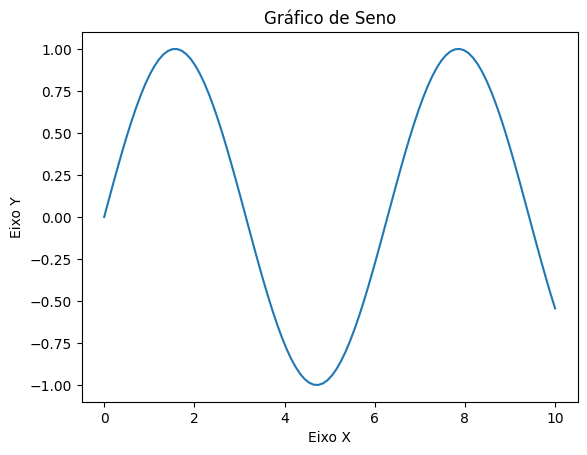

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Exemplo básico de gráfico de linha
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y)
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.title("Gráfico de Seno")
plt.show() # Em scripts Python, plt.show() exibe o gráfico. Em notebooks, geralmente não é necessário.

**Interface Orientada a Objetos:**

Para gráficos mais complexos ou para ter mais controle, a interface orientada a objetos é recomendada. Ela envolve a criação explícita de figuras (`Figure`) e eixos (`Axes`).

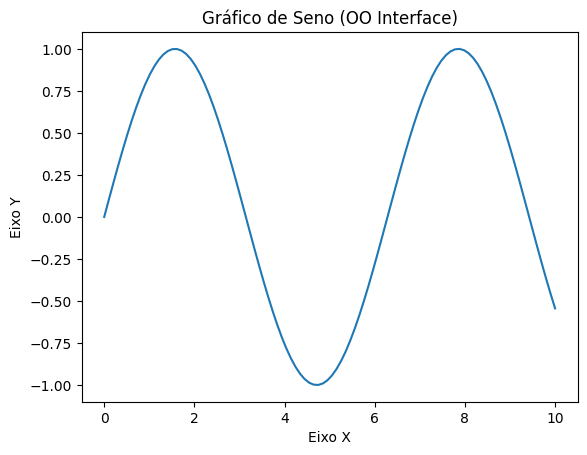

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Exemplo básico usando a interface orientada a objetos
fig, ax = plt.subplots() # Cria uma figura e um conjunto de eixos
ax.plot(x, y)
ax.set_xlabel("Eixo X")
ax.set_ylabel("Eixo Y")
ax.set_title("Gráfico de Seno (OO Interface)")
plt.show()

Visualizando o salário médio por departamento:


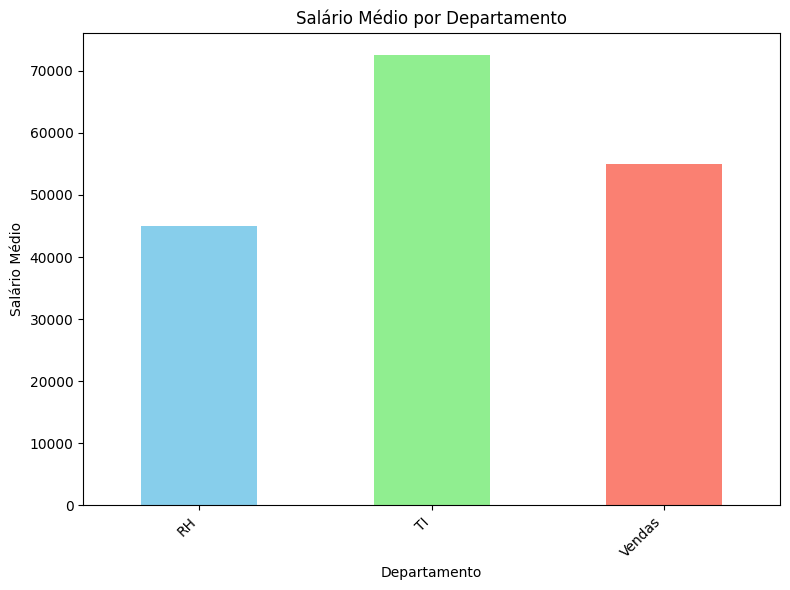

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Usando o DataFrame de exemplo de salários por departamento criado anteriormente
df_ex4 = {'Departamento': ['Vendas', 'TI', 'Vendas', 'TI', 'RH', 'Vendas'],
            'Salario': [50000, 70000, 55000, 75000, 45000, 60000]}
df_ex4 = pd.DataFrame(df_ex4)

# Agrupando por departamento e calculando o salário médio
salario_medio_por_departamento = df_ex4.groupby('Departamento')['Salario'].mean()

print("Visualizando o salário médio por departamento:")
# Criando um gráfico de barras a partir da Series resultante
plt.figure(figsize=(8, 6)) # Define o tamanho da figura
salario_medio_por_departamento.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Salário Médio por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Salário Médio')
plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo x para melhor leitura
plt.tight_layout() # Ajusta o layout para evitar cortes
plt.show()